In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

Cleaning the benificary dataset Dataset

In [4]:
tbd_data = pd.read_csv("hospital dataset\\Train_Beneficiarydata-1542865627584.csv")
tbd_data_test = pd.read_csv("hospital dataset\\Test_Beneficiarydata-1542969243754.csv")
tbd_data
df = pd.DataFrame(tbd_data)
df_test = pd.DataFrame(tbd_data)
pd.set_option('display.max_columns',50)
df

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,1,2,2,2,2,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,2,1,1,1,2,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,1,1,2,2,2,2,2,1,2,2,2,0,0,2650,10


In [5]:
#Cleaning the data:

col_list = ['Gender', 'Race', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer','ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

for col in col_list:
    label_encoder = preprocessing.LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    df_test[col] = label_encoder.fit_transform(df_test[col])
df

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,1,0,0,39,280,12,12,1,1,1,1,1,1,1,1,1,1,1,0,0,30,50
2,BENE11003,1936-08-01,NaN,0,0,0,52,590,12,12,0,1,1,1,1,1,1,0,1,1,1,0,0,90,40
3,BENE11004,1922-07-01,NaN,0,0,0,39,270,12,12,0,0,1,1,1,1,0,0,0,0,1,0,0,1810,760
4,BENE11005,1935-09-01,NaN,0,0,0,24,680,12,12,1,1,1,1,0,1,0,1,1,1,1,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,0,0,0,39,140,12,12,0,1,1,1,1,1,1,1,1,1,1,0,0,430,460
138552,BENE159195,1938-12-01,NaN,1,0,0,49,530,12,12,0,1,1,1,1,1,0,1,1,1,1,0,0,880,100
138553,BENE159196,1916-06-01,NaN,1,0,0,6,150,12,12,1,0,0,0,1,0,0,0,1,1,1,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,0,0,0,16,560,12,12,0,0,1,1,1,1,1,0,1,1,1,0,0,2650,10


In [6]:
#Remove NAN from dod and replace it with none

df['DOD'] = pd.to_datetime(df['DOD'])
df['DOB'] = pd.to_datetime(df['DOB'])
df['Deceased'] = np.where((df['DOD'].replace(np.nan,'rep') == 'rep'), 0, 1)
df['Age'] = round(((df['DOD'] - df['DOB']).dt.days)/365)
df['Age'] = df['Age'].fillna(((pd.to_datetime('2010-12-01',format ='%Y-%m-%d')-df['DOB']).dt.days)/365)
#df['Age'] = df['Age'].fillna(((pd.to_datetime(date.today())-df['DOB']).dt.days)/365)
df['Age'] = df['Age'].astype(int)

# Creating one column for reimbursement and deductible total amounts

df['Tot_Reimbursed_Amt'] = df['IPAnnualReimbursementAmt'] + df['OPAnnualReimbursementAmt']	
df['Tot_Deductible_Amt'] = df['IPAnnualDeductibleAmt'] + df['OPAnnualReimbursementAmt'] 
df



#Remove NAN from dod and replace it with none

df_test['DOD'] = pd.to_datetime(df_test['DOD'])
df_test['DOB'] = pd.to_datetime(df_test['DOB'])
df_test['Deceased'] = np.where((df_test['DOD'].replace(np.nan,'rep') == 'rep'), 0, 1)
df_test['Age'] = round(((df_test['DOD'] - df_test['DOB']).dt.days)/365)
df_test['Age'] = df_test['Age'].fillna(((pd.to_datetime('2010-12-01',format ='%Y-%m-%d')-df_test['DOB']).dt.days)/365)
#df['Age'] = df['Age'].fillna(((pd.to_datetime(date.today(_test))-df['DOB']).dt.days)/365)
df_test['Age'] = df_test['Age'].astype(int)

# Creating one column for reimbursement and deductible total amounts

df_test['Tot_Reimbursed_Amt'] = df_test['IPAnnualReimbursementAmt'] + df_test['OPAnnualReimbursementAmt']	
df_test['Tot_Deductible_Amt'] = df_test['IPAnnualDeductibleAmt'] + df_test['OPAnnualReimbursementAmt'] 
df_test

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt
0,BENE11001,1943-01-01,NaT,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,0,67,36060,3264
1,BENE11002,1936-09-01,NaT,1,0,0,39,280,12,12,1,1,1,1,1,1,1,1,1,1,1,0,0,30,50,0,74,30,30
2,BENE11003,1936-08-01,NaT,0,0,0,52,590,12,12,0,1,1,1,1,1,1,0,1,1,1,0,0,90,40,0,74,90,90
3,BENE11004,1922-07-01,NaT,0,0,0,39,270,12,12,0,0,1,1,1,1,0,0,0,0,1,0,0,1810,760,0,88,1810,1810
4,BENE11005,1935-09-01,NaT,0,0,0,24,680,12,12,1,1,1,1,0,1,0,1,1,1,1,0,0,1790,1200,0,75,1790,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaT,0,0,0,39,140,12,12,0,1,1,1,1,1,1,1,1,1,1,0,0,430,460,0,71,430,430
138552,BENE159195,1938-12-01,NaT,1,0,0,49,530,12,12,0,1,1,1,1,1,0,1,1,1,1,0,0,880,100,0,72,880,880
138553,BENE159196,1916-06-01,NaT,1,0,0,6,150,12,12,1,0,0,0,1,0,0,0,1,1,1,2000,1068,3240,1390,0,94,5240,4308
138554,BENE159197,1930-01-01,NaT,0,0,0,16,560,12,12,0,0,1,1,1,1,1,0,1,1,1,0,0,2650,10,0,80,2650,2650


Cleaning the Inpatient data

In [7]:
in_data = pd.read_csv("hospital dataset\\Train_Inpatientdata-1542865627584.csv")
df_in = pd.DataFrame(in_data)
df_in


in_data_test = pd.read_csv("hospital dataset\\Test_Inpatientdata-1542969243754.csv")
df_in_test = pd.DataFrame(in_data_test)
df_in_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,57400,1068.0,2009-07-26,432,57400,V1251,2740,4019,78702,53081,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,V5789,1068.0,2009-03-29,951,V5789,34831,V5481,3559,5601,43820,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,78903,1068.0,2009-10-12,655,1981,27651,71690,41401,4019,591,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,7843,1068.0,2009-10-17,087,43311,40390,V667,7840,4019,4371,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#cleaning the data:

df_in['DeductibleAmtPaid'] = df_in['DeductibleAmtPaid'].fillna(0)
  
	# Where no codes were listed, 0 was used

col_list = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3','ClmAdmitDiagnosisCode']

for col in col_list:
	df_in[col] = df_in[col].fillna('None')

	# For missing doctor code values, None were added as there was no doctor listed for that category

for col in ('AttendingPhysician','OperatingPhysician','OtherPhysician'):
	df_in[col] = df_in[col].fillna('None')  
df_in



#cleaning the data:

df_in_test['DeductibleAmtPaid'] = df_in_test['DeductibleAmtPaid'].fillna(0)
  
	# Where no codes were listed, 0 was used

col_list = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3','ClmAdmitDiagnosisCode']

for col in col_list:
	df_in_test[col] = df_in_test[col].fillna('None')

	# For missing doctor code values, None were added as there was no doctor listed for that category

for col in ('AttendingPhysician','OperatingPhysician','OtherPhysician'):
	df_in_test[col] = df_in_test[col].fillna('None')  
df_in_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,None,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,None,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,None,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,None,5551.0,None,None,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,None,None,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,None,None,None,None,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,None,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,None,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,None,None,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,None,None,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,None,2009-07-24,57400,1068.0,2009-07-26,432,57400,V1251,2740,4019,78702,53081,53540,5715,56210,None,5122.0,4019.0,None,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,None,None,2009-03-16,V5789,1068.0,2009-03-29,951,V5789,34831,V5481,3559,5601,43820,78720,72402,V5413,None,None,None,None,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,None,None,2009-09-07,78903,1068.0,2009-10-12,655,1981,27651,71690,41401,4019,591,E8798,60000,28521,4280,None,None,None,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,None,None,2009-10-14,7843,1068.0,2009-10-17,087,43311,40390,V667,7840,4019,4371,2724,25080,29383,None,None,None,None,NaN,NaN,NaN


In [9]:
df_in['DeductibleAmtPaid'] = df_in['DeductibleAmtPaid'].fillna(0)
  


col_list = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3','ClmAdmitDiagnosisCode']

for col in col_list:
	df_in[col] = df_in[col].fillna('None')

	# For missing doctor code values, None were added as there was no doctor listed for that category

for col in ('AttendingPhysician','OperatingPhysician','OtherPhysician'):
	df_in[col] = df_in[col].fillna('None')    

    
df_in['ClaimStartDt'] = pd.to_datetime(df_in['ClaimStartDt'])
df_in['ClaimEndDt'] = pd.to_datetime(df_in['ClaimEndDt'])
df_in['AdmissionDt'] = pd.to_datetime(df_in['AdmissionDt'])
df_in['DischargeDt'] = pd.to_datetime(df_in['DischargeDt'])

	# Creating Hospital_Stay and Claim_Duration features and changing
	# dtype to int
df_in['Hospital_Stay'] = round(((df_in['DischargeDt'] - df_in['AdmissionDt']).dt.days))
df_in['Claim_Duration'] = round(((df_in['ClaimEndDt'] - df_in['ClaimStartDt']).dt.days))
df_in['Hospital_Stay'] = df_in['Hospital_Stay'].astype(int)
df_in['Claim_Duration'] = df_in['Claim_Duration'].astype(int)


	# Breaking down claim made month and year

df_in['Claim_Start_Year'] = df_in['ClaimStartDt'].dt.year
df_in['Claim_Start_Month'] = df_in['ClaimStartDt'].dt.month

	# Insurance covered percentages

df_in['Insurance_Covered_Per'] = round((df_in['InscClaimAmtReimbursed']/(df_in['InscClaimAmtReimbursed']+df_in['DeductibleAmtPaid']))*100, 2)
df_in['Insurance_Covered_Per'] = df_in['Insurance_Covered_Per'].fillna(0)

	# Total claim amount

df_in['Total_Claim_Amt'] = (df_in['InscClaimAmtReimbursed']+df_in['DeductibleAmtPaid'])

	# Count of total number of physicians for each beneficiary

phy_df = df_in[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].drop_duplicates()

phy_df = phy_df.loc[phy_df.AttendingPhysician != 'None',:].loc[phy_df.OperatingPhysician != 'None',:].loc[phy_df.OtherPhysician != 'None',:]	

phy_df = phy_df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].groupby('BeneID').agg(['count']).reset_index()

phy_df.columns=['Bene_ID','Att_cnt', 'Op_cnt', 'Othr_cnt']

df_in['Physician_Count'] = phy_df['Att_cnt'] + phy_df['Op_cnt'] + phy_df['Othr_cnt']
df_in['Physician_Count'] = df_in['Physician_Count'].fillna(0)
df_in['Physician_Count'] = df_in['Physician_Count'].astype(int)

	# Count of claims and hospitals associated with per beneficiary

cl_df = df_in[['BeneID','ClaimID']].groupby('BeneID').agg(['count']).reset_index()
cl_df.columns=['Bene_ID','Cl_cnt']

df_in['Claim_Count'] = cl_df['Cl_cnt']
df_in['Claim_Count'] = df_in['Claim_Count'].fillna(0)
df_in['Claim_Count'] = df_in['Claim_Count'].astype(int)


prv_df = df_in[['BeneID','Provider']].drop_duplicates()
prv_df = prv_df[['BeneID','Provider']].groupby('BeneID').agg(['count']).reset_index()

prv_df.columns=['Bene_ID','Prov_cnt']

df_in['Hospital_Count'] = prv_df['Prov_cnt']
df_in['Hospital_Count'] = df_in['Hospital_Count'].fillna(0)
df_in['Hospital_Count'] = df_in['Hospital_Count'].astype(int)
df_in


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,NaN,NaN,NaN,6,6,2009,4,96.05,27068.0,3,1,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,None,None,None,None,None,None,None,7092.0,None,None,NaN,NaN,NaN,2,2,2009,8,82.40,6068.0,3,1,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,None,None,None,None,None,None,None,NaN,NaN,NaN,3,3,2009,9,82.40,6068.0,3,1,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,None,331.0,None,None,NaN,NaN,NaN,8,8,2009,2,82.40,6068.0,3,1,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,None,3893.0,None,None,NaN,NaN,NaN,17,17,2009,8,90.35,11068.0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,None,2009-09-28,2859,1068.0,2009-10-02,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,None,None,NaN,NaN,NaN,4,4,2009,9,86.76,8068.0,0,0,0
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,None,2009-11-03,79902,1068.0,2009-11-06,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,None,8605.0,None,None,NaN,NaN,NaN,3,3,2009,11,78.93,5068.0,0,0,0
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,None,2009-11-18,78605,1068.0,2009-11-22,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,None,9390.0,None,None,NaN,NaN,NaN,4,4,2009,11,73.75,4068.0,0,0,0
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,None,None,2009-12-17,7802,1068.0,2009-12-18,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,None,None,None,None,NaN,NaN,NaN,1,1,2009,12,82.40,6068.0,0,0,0


In [10]:
df_in_test['DeductibleAmtPaid'] = df_in_test['DeductibleAmtPaid'].fillna(0)
  


col_list = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3','ClmAdmitDiagnosisCode']

for col in col_list:
	df_in_test[col] = df_in_test[col].fillna('None')

	# For missing doctor code values, None were added as there was no doctor listed for that category

for col in ('AttendingPhysician','OperatingPhysician','OtherPhysician'):
	df_in_test[col] = df_in_test[col].fillna('None')    

    
df_in_test['ClaimStartDt'] = pd.to_datetime(df_in_test['ClaimStartDt'])
df_in_test['ClaimEndDt'] = pd.to_datetime(df_in_test['ClaimEndDt'])
df_in_test['AdmissionDt'] = pd.to_datetime(df_in_test['AdmissionDt'])
df_in_test['DischargeDt'] = pd.to_datetime(df_in_test['DischargeDt'])

	# Creating Hospital_Stay and Claim_Duration features and changing
	# dtype to int
df_in_test['Hospital_Stay'] = round(((df_in_test['DischargeDt'] - df_in_test['AdmissionDt']).dt.days))
df_in_test['Claim_Duration'] = round(((df_in_test['ClaimEndDt'] - df_in_test['ClaimStartDt']).dt.days))
df_in_test['Hospital_Stay'] = df_in_test['Hospital_Stay'].astype(int)
df_in_test['Claim_Duration'] = df_in_test['Claim_Duration'].astype(int)


	# Breaking down claim made month and year

df_in_test['Claim_Start_Year'] = df_in_test['ClaimStartDt'].dt.year
df_in_test['Claim_Start_Month'] = df_in_test['ClaimStartDt'].dt.month

	# Insurance covered percentages

df_in_test['Insurance_Covered_Per'] = round((df_in_test['InscClaimAmtReimbursed']/(df_in_test['InscClaimAmtReimbursed']+df_in_test['DeductibleAmtPaid']))*100, 2)
df_in_test['Insurance_Covered_Per'] = df_in_test['Insurance_Covered_Per'].fillna(0)

	# Total claim amount

df_in_test['Total_Claim_Amt'] = (df_in_test['InscClaimAmtReimbursed']+df_in_test['DeductibleAmtPaid'])

	# Count of total number of physicians for each beneficiary

phy_df = df_in_test[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].drop_duplicates()

phy_df = phy_df.loc[phy_df.AttendingPhysician != 'None',:].loc[phy_df.OperatingPhysician != 'None',:].loc[phy_df.OtherPhysician != 'None',:]	

phy_df = phy_df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].groupby('BeneID').agg(['count']).reset_index()

phy_df.columns=['Bene_ID','Att_cnt', 'Op_cnt', 'Othr_cnt']

df_in_test['Physician_Count'] = phy_df['Att_cnt'] + phy_df['Op_cnt'] + phy_df['Othr_cnt']
df_in_test['Physician_Count'] = df_in_test['Physician_Count'].fillna(0)
df_in_test['Physician_Count'] = df_in_test['Physician_Count'].astype(int)

	# Count of claims and hospitals associated with per beneficiary

cl_df = df_in_test[['BeneID','ClaimID']].groupby('BeneID').agg(['count']).reset_index()
cl_df.columns=['Bene_ID','Cl_cnt']

df_in_test['Claim_Count'] = cl_df['Cl_cnt']
df_in_test['Claim_Count'] = df_in_test['Claim_Count'].fillna(0)
df_in_test['Claim_Count'] = df_in_test['Claim_Count'].astype(int)


prv_df = df_in_test[['BeneID','Provider']].drop_duplicates()
prv_df = prv_df[['BeneID','Provider']].groupby('BeneID').agg(['count']).reset_index()

prv_df.columns=['Bene_ID','Prov_cnt']

df_in_test['Hospital_Count'] = prv_df['Prov_cnt']
df_in_test['Hospital_Count'] = df_in_test['Hospital_Count'].fillna(0)
df_in_test['Hospital_Count'] = df_in_test['Hospital_Count'].astype(int)
df_in_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,None,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,None,NaN,NaN,NaN,7,7,2009,9,89.39,10068.0,3,1,1
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,None,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,None,5551.0,None,None,NaN,NaN,NaN,14,14,2008,12,92.91,15068.0,3,1,1
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,None,None,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,None,None,None,None,NaN,NaN,NaN,4,4,2009,12,65.19,3068.0,3,2,1
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,None,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,None,NaN,NaN,NaN,13,13,2009,6,93.74,17068.0,3,1,1
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,None,None,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,None,None,None,None,None,NaN,NaN,NaN,11,11,2009,1,94.68,20068.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,None,2009-07-24,57400,1068.0,2009-07-26,432,57400,V1251,2740,4019,78702,53081,53540,5715,56210,None,5122.0,4019.0,None,NaN,NaN,NaN,2,2,2009,7,95.56,24068.0,0,0,0
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,None,None,2009-03-16,V5789,1068.0,2009-03-29,951,V5789,34831,V5481,3559,5601,43820,78720,72402,V5413,None,None,None,None,NaN,NaN,NaN,13,13,2009,3,96.95,35068.0,0,0,0
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,None,None,2009-09-07,78903,1068.0,2009-10-12,655,1981,27651,71690,41401,4019,591,E8798,60000,28521,4280,None,None,None,NaN,NaN,NaN,35,35,2009,9,82.40,6068.0,0,0,0
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,None,None,2009-10-14,7843,1068.0,2009-10-17,087,43311,40390,V667,7840,4019,4371,2724,25080,29383,None,None,None,None,NaN,NaN,NaN,3,3,2009,10,73.75,4068.0,0,0,0


In [11]:
out_data = pd.read_csv("hospital dataset\\Train_Inpatientdata-1542865627584.csv")
df_out = pd.DataFrame(out_data)
df_out


out_data_test = pd.read_csv("hospital dataset\\Test_Outpatientdata-1542969243754.csv")
df_out_test = pd.DataFrame(out_data_test)
df_out_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,7295,99685,V8289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,7962,4019,V5869,V4581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Cleaning outpatient dataset

In [12]:
#cleaning out data
df_out['DeductibleAmtPaid'] = df_out['DeductibleAmtPaid'].fillna(0)
col_list = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3','ClmAdmitDiagnosisCode']
for col in col_list:
	df_out[col] = df_out[col].fillna('None')
for col in ('AttendingPhysician','OperatingPhysician','OtherPhysician'):
	df_out[col] = df_out[col].fillna('None')    

In [13]:
#cleaning out data
df_out_test['DeductibleAmtPaid'] = df_out_test['DeductibleAmtPaid'].fillna(0)
col_list = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3','ClmAdmitDiagnosisCode']
for col in col_list:
	df_out_test[col] = df_out_test[col].fillna('None')
for col in ('AttendingPhysician','OperatingPhysician','OtherPhysician'):
	df_out_test[col] = df_out_test[col].fillna('None')    

In [14]:
#adding new features


df_out['ClaimStartDt'] = pd.to_datetime(df_out['ClaimStartDt'])
df_out['ClaimEndDt'] = pd.to_datetime(df_out['ClaimEndDt'])
df_out['Claim_Duration'] = round(((df_out['ClaimEndDt'] - df_out['ClaimStartDt']).dt.days))
df_out['Claim_Duration'] = df_out['Claim_Duration'].astype(int)
df_out['Claim_Start_Year'] = df_out['ClaimStartDt'].dt.year
df_out['Claim_Start_Month'] = df_out['ClaimStartDt'].dt.month
df_out['Insurance_Covered_Per'] = round((df_out['InscClaimAmtReimbursed']/(df_out['InscClaimAmtReimbursed']+df_out['DeductibleAmtPaid']))*100, 2)
df_out['Insurance_Covered_Per'] = df_out['Insurance_Covered_Per'].fillna(0)
df_out['Total_Claim_Amt'] = (df_out['InscClaimAmtReimbursed']+df_out['DeductibleAmtPaid'])

	# Count of total number of physicians for each beneficiary

phy_df = df_out[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].drop_duplicates()

phy_df = phy_df.loc[phy_df.AttendingPhysician != 'None',:].loc[phy_df.OperatingPhysician != 'None',:].loc[phy_df.OtherPhysician != 'None',:]

phy_df = phy_df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].groupby('BeneID').agg(['count']).reset_index()

phy_df.columns=['Bene_ID','Att_cnt', 'Op_cnt', 'Othr_cnt']

df_out['Physician_Count'] = phy_df['Att_cnt'] + phy_df['Op_cnt'] + phy_df['Othr_cnt']
df_out['Physician_Count'] = df_out['Physician_Count'].fillna(0)
df_out['Physician_Count'] = df_out['Physician_Count'].astype(int)
cl_df = df_out[['BeneID','ClaimID']].groupby('BeneID').agg(['count']).reset_index()
cl_df.columns=['Bene_ID','Cl_cnt']

df_out['Claim_Count'] = cl_df['Cl_cnt']
df_out['Claim_Count'] = df_out['Claim_Count'].fillna(0)
df_out['Claim_Count'] = df_out['Claim_Count'].astype(int)


prv_df = df_out[['BeneID','Provider']].drop_duplicates()
prv_df = prv_df[['BeneID','Provider']].groupby('BeneID').agg(['count']).reset_index()

prv_df.columns=['Bene_ID','Prov_cnt']

df_out['Hospital_Count'] = prv_df['Prov_cnt']
df_out['Hospital_Count'] = df_out['Hospital_Count'].fillna(0)
df_out['Hospital_Count'] = df_out['Hospital_Count'].astype(int)


df_out

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,NaN,NaN,NaN,6,2009,4,96.05,27068.0,3,1,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,None,None,None,None,None,None,None,7092.0,None,None,NaN,NaN,NaN,2,2009,8,82.40,6068.0,3,1,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,None,None,None,None,None,None,None,NaN,NaN,NaN,3,2009,9,82.40,6068.0,3,1,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,None,331.0,None,None,NaN,NaN,NaN,8,2009,2,82.40,6068.0,3,1,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,None,3893.0,None,None,NaN,NaN,NaN,17,2009,8,90.35,11068.0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,None,2009-09-28,2859,1068.0,2009-10-02,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,None,None,NaN,NaN,NaN,4,2009,9,86.76,8068.0,0,0,0
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,None,2009-11-03,79902,1068.0,2009-11-06,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,None,8605.0,None,None,NaN,NaN,NaN,3,2009,11,78.93,5068.0,0,0,0
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,None,2009-11-18,78605,1068.0,2009-11-22,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,None,9390.0,None,None,NaN,NaN,NaN,4,2009,11,73.75,4068.0,0,0,0
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,None,None,2009-12-17,7802,1068.0,2009-12-18,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,None,None,None,None,NaN,NaN,NaN,1,2009,12,82.40,6068.0,0,0,0


In [15]:
#adding new features


df_out_test['ClaimStartDt'] = pd.to_datetime(df_out_test['ClaimStartDt'])
df_out_test['ClaimEndDt'] = pd.to_datetime(df_out_test['ClaimEndDt'])
df_out_test['Claim_Duration'] = round(((df_out_test['ClaimEndDt'] - df_out_test['ClaimStartDt']).dt.days))
df_out_test['Claim_Duration'] = df_out_test['Claim_Duration'].astype(int)
df_out_test['Claim_Start_Year'] = df_out_test['ClaimStartDt'].dt.year
df_out_test['Claim_Start_Month'] = df_out_test['ClaimStartDt'].dt.month
df_out_test['Insurance_Covered_Per'] = round((df_out_test['InscClaimAmtReimbursed']/(df_out_test['InscClaimAmtReimbursed']+df_out_test['DeductibleAmtPaid']))*100, 2)
df_out_test['Insurance_Covered_Per'] = df_out_test['Insurance_Covered_Per'].fillna(0)
df_out_test['Total_Claim_Amt'] = (df_out_test['InscClaimAmtReimbursed']+df_out['DeductibleAmtPaid'])

	# Count of total number of physicians for each beneficiary

phy_df = df_out_test[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].drop_duplicates()

phy_df = phy_df.loc[phy_df.AttendingPhysician != 'None',:].loc[phy_df.OperatingPhysician != 'None',:].loc[phy_df.OtherPhysician != 'None',:]

phy_df = phy_df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']].groupby('BeneID').agg(['count']).reset_index()

phy_df.columns=['Bene_ID','Att_cnt', 'Op_cnt', 'Othr_cnt']

df_out_test['Physician_Count'] = phy_df['Att_cnt'] + phy_df['Op_cnt'] + phy_df['Othr_cnt']
df_out_test['Physician_Count'] = df_out_test['Physician_Count'].fillna(0)
df_out_test['Physician_Count'] = df_out_test['Physician_Count'].astype(int)
cl_df = df_out_test[['BeneID','ClaimID']].groupby('BeneID').agg(['count']).reset_index()
cl_df.columns=['Bene_ID','Cl_cnt']

df_out_test['Claim_Count'] = cl_df['Cl_cnt']
df_out_test['Claim_Count'] = df_out_test['Claim_Count'].fillna(0)
df_out_test['Claim_Count'] = df_out_test['Claim_Count'].astype(int)


prv_df = df_out_test[['BeneID','Provider']].drop_duplicates()
prv_df = prv_df[['BeneID','Provider']].groupby('BeneID').agg(['count']).reset_index()

prv_df.columns=['Bene_ID','Prov_cnt']

df_out_test['Hospital_Count'] = prv_df['Prov_cnt']
df_out_test['Hospital_Count'] = df_out_test['Hospital_Count'].fillna(0)
df_out_test['Hospital_Count'] = df_out_test['Hospital_Count'].astype(int)


df_out_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,None,PHY347633,V5832,V5861,2724,3182,V5869,42731,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,6,100.0,1098.0,3,1,1
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,None,PHY381777,9594,E9174,4019,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,6,100.0,1098.0,3,1,1
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,None,PHY425311,7248,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,3,100.0,1268.0,3,1,1
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,None,58889,2449,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,5939,0,2009,7,100.0,1078.0,3,5,3
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,None,PHY382041,V666,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,8,100.0,1078.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,None,None,79021,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,7,100.0,NaN,0,0,0
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,None,None,72811,7295,99685,V8289,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,7,100.0,NaN,0,0,0
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,None,None,9181,2449,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,92420,0,2009,8,100.0,NaN,0,0,0
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,None,PHY406767,V4582,7962,4019,V5869,V4581,None,None,None,None,None,None,None,None,NaN,NaN,NaN,0,None,0,2009,5,100.0,NaN,0,0,0


In [16]:
#SMOTE
#Adaboost model to be applied to find out fraud
#XGBoost model to be applied to find out fraud
#ADABoost model with LR 
#Accuracy calculation 
#Anlysis of result
#Create a form 
#use ocr

In [17]:
#Saving the new dataframes generated to csv file for further usage.
df1new =  pd.concat([df_in, df_out], axis=1, join="inner")
df2new = pd.concat([df1new, df], axis=1, join="inner")
xx = pd.read_csv("hospital dataset\\Train-1542865627584.csv")
df_output = pd.DataFrame(xx)
df_final = pd.concat([df_output,df2new],axis = 1, join = "inner")
df_final

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,...,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt
0,PRV51001,No,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,...,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,0,67,36060,3264
1,PRV51003,Yes,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,None,None,None,None,None,None,...,0,0,39,280,12,12,1,1,1,1,1,1,1,1,1,1,1,0,0,30,50,0,74,30,30
2,PRV51004,No,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,None,None,None,...,0,0,52,590,12,12,0,1,1,1,1,1,1,0,1,1,1,0,0,90,40,0,74,90,90
3,PRV51005,Yes,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,...,0,0,39,270,12,12,0,0,1,1,1,1,0,0,0,0,1,0,0,1810,760,0,88,1810,1810
4,PRV51007,No,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,...,0,0,24,680,12,12,1,1,1,1,0,1,0,1,1,1,1,0,0,1790,1200,0,75,1790,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,BENE30528,CLM34960,2009-01-22,2009-01-27,PRV57228,8000,PHY389710,None,None,2009-01-22,7242,1068.0,2009-01-27,469,8082,5856,5533,41071,73300,78039,2948,43491,25000,...,0,0,16,930,12,12,1,1,1,1,1,1,1,1,1,1,1,0,0,430,310,0,79,430,430
5406,PRV57760,No,BENE30536,CLM58168,2009-07-03,2009-07-08,PRV55048,15000,PHY399381,PHY399381,None,2009-07-03,42781,1068.0,2009-07-08,242,42781,4263,7802,4168,5849,2449,V066,42832,42830,...,0,0,39,160,12,12,0,0,0,1,0,0,0,0,1,1,0,0,0,400,210,0,69,400,400
5407,PRV57761,No,BENE30540,CLM64528,2009-08-19,2009-08-25,PRV55482,11000,PHY360860,PHY338047,None,2009-08-19,71536,1068.0,2009-08-25,499,71536,V1046,2875,4019,2851,4359,4589,73300,2768,...,0,0,7,40,12,12,1,0,1,1,1,0,0,1,0,1,1,0,0,990,150,0,80,990,990
5408,PRV57762,No,BENE30544,CLM60882,2009-07-23,2009-07-28,PRV56023,3000,PHY396594,None,None,2009-07-23,34580,1068.0,2009-07-28,053,34540,43490,30002,4660,V1051,4019,2724,42731,25000,...,0,0,37,230,12,12,1,1,1,1,0,0,0,0,0,0,1,7400,2136,10,450,0,91,7410,2146


In [18]:
df1new_test =  pd.concat([df_in_test, df_out_test], axis=1, join="inner")
df2new_test = pd.concat([df1new_test, df_test], axis=1, join="inner")
xx = pd.read_csv("hospital dataset\\Test-1542969243754.csv")
df_output_test = pd.DataFrame(xx)
df_final_test = pd.concat([df_output_test,df2new_test],axis = 1, join = "inner")
df_final_test

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,...,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt
0,PRV51002,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,None,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,...,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,0,67,36060,3264
1,PRV51006,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,None,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,None,...,0,0,39,280,12,12,1,1,1,1,1,1,1,1,1,1,1,0,0,30,50,0,74,30,30
2,PRV51009,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,None,None,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,None,...,0,0,52,590,12,12,0,1,1,1,1,1,1,0,1,1,1,0,0,90,40,0,74,90,90
3,PRV51010,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,None,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,...,0,0,39,270,12,12,0,0,1,1,1,1,0,0,0,0,1,0,0,1810,760,0,88,1810,1810
4,PRV51018,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,None,None,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,None,None,...,0,0,24,680,12,12,1,1,1,1,0,1,0,1,1,1,1,0,0,1790,1200,0,75,1790,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,PRV57713,BENE31729,CLM42965,2009-03-17,2009-03-19,PRV52388,4000,PHY334833,None,None,2009-03-17,7802,1068.0,2009-03-19,312,4580,4019,49390,41401,33394,78039,2948,2724,44023,None,...,0,0,18,990,12,12,0,0,0,0,0,0,1,0,1,1,1,0,0,320,390,0,48,320,320
1349,PRV57726,BENE31729,CLM78882,2009-12-08,2009-12-19,PRV52388,17000,PHY382604,None,None,2009-12-08,3009,1068.0,2009-12-19,033,3310,V4501,3899,5990,53081,4280,29040,V1011,29411,None,...,0,0,22,130,12,12,0,0,0,1,1,0,1,0,1,1,1,0,0,520,360,0,73,520,520
1350,PRV57745,BENE31743,CLM73251,2009-10-24,2009-10-27,PRV53866,4000,PHY329480,None,None,2009-10-24,486,1068.0,2009-10-27,203,485,29410,70721,4019,2859,2449,2724,412,V1046,None,...,0,0,31,230,12,12,0,0,1,1,0,1,1,0,1,1,1,17000,1068,4370,1040,0,44,21370,5438
1351,PRV57749,BENE31799,CLM51887,2009-05-20,2009-05-28,PRV53610,33000,PHY350999,PHY324672,None,2009-05-20,7804,1068.0,2009-05-28,292,42731,V1079,25053,2724,41401,42822,4142,4019,43310,None,...,0,0,18,550,12,12,1,1,1,1,1,1,1,0,1,1,1,0,0,40,200,0,49,40,40


In [19]:
label_encoder = preprocessing.LabelEncoder()
df_final['PotentialFraud']= label_encoder.fit_transform(df_final['PotentialFraud'])
df_final['Tot_Reimbursed_Amt'] = df_final['IPAnnualReimbursementAmt'] + df_final['OPAnnualReimbursementAmt']
df_final['Tot_Deductible_Amt'] = df_final['IPAnnualDeductibleAmt'] + df_final['OPAnnualDeductibleAmt']
df_final
df_final.to_csv(r'train.csv')


In [20]:
label_encoder = preprocessing.LabelEncoder()

df_final_test['Tot_Reimbursed_Amt'] = df_final_test['IPAnnualReimbursementAmt'] + df_final_test['OPAnnualReimbursementAmt']
df_final_test['Tot_Deductible_Amt'] = df_final_test['IPAnnualDeductibleAmt'] + df_final_test['OPAnnualDeductibleAmt']
df_final_test
df_final_test.to_csv(r'test.csv')

Load training and testing data

In [43]:
#We can load the database of test and train however since it is already present in the df it is not loaded here 
#print(df_final)
x = df_final.columns
xt = df_final_test.columns
print(x.difference(xt))
print(df_final.shape)
print(df_final_test.shape)

Index(['PotentialFraud'], dtype='object')
(5410, 108)
(1353, 104)


no of 1 :  506
no of 0:  4904


[]

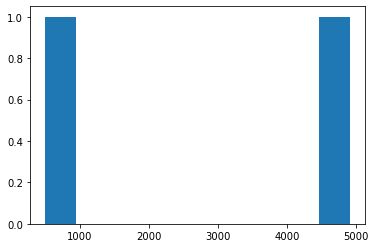

In [41]:
freq_1 = list(df_final['PotentialFraud']).count(1)
freq_0 = list(df_final['PotentialFraud']).count(0)
print("no of 1 : ",freq_1)
print("no of 0: ",freq_0)
plt.hist([freq_1,freq_0])
plt.plot()